<a href="https://colab.research.google.com/github/svendstar/MyAppliedStatistics2020repository/blob/main/Measurement_of_each_persons_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install iminuit

     |████████████████████████████████| 286kB 9.1MB/s 


### ***Measuring Error on each persons uncertainty in  measuring time: Pendulum.***

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import os

In [3]:
!git clone https://github.com/svendstar/MyAppliedStatistics2020repository #Clones my repository (Where i have stored all of the timing files) into Google Colab environment

Cloning into 'MyAppliedStatistics2020repository'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


**I will now create a function that loads each .dat file in a given directory, and saves them under a variable of the same name as a file**

In [51]:
#Here i define the function:
def getfilenames(path):
  names=[]
  for filename in os.listdir(path):                   #Get the filename of every file in the specified path
    names.append(str(os.path.splitext(filename)[0]))  #Append the file name as a string in a list called "names"
  return names

In [52]:
filespath="MyAppliedStatistics2020repository/Period_measurements/" #Set the location of the path
names=getfilenames(filespath)   #Use the newly created function and save all names of the files into "names"
names.sort()                    #Sort the list of file names into alphebetical order for practicality
#print(names)


In [48]:
# Here we will nor create a variable for each of the timings data, and name them according to their original file name.
for i in names:
  globals()[i]=np.genfromtxt("MyAppliedStatistics2020repository/Period_measurements/"+i+".dat", delimiter="")

#Now we have code to get all of the relevant variables, complicated, but fast and can be be generalized to any number of files in a directory.

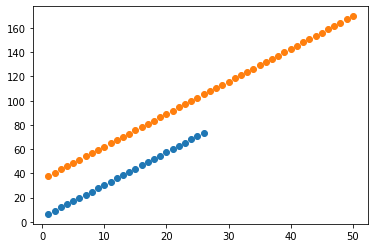

In [62]:
plt.scatter(LiamOther[:,0],LiamOther[:,1])
plt.scatter(Liam_Full_Pendulum_Period_timings[:,0],Liam_Full_Pendulum_Period_timings[:,1])

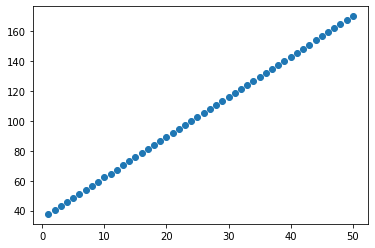

In [61]:
plt.scatter(Liam_Full_Pendulum_Period_timings[:,0],Liam_Full_Pendulum_Period_timings[:,1])